In [1]:
import torch
import matplotlib.pyplot as plt
import glob
from utils import imageSize
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchmetrics import Accuracy
from torch.utils.tensorboard import SummaryWriter


In [2]:

# Assuming you want to create a DataLoader for image datasets
transform = transforms.Compose([
    transforms.Resize((imageSize, imageSize)),
    transforms.ToTensor()
])

# Create a dataset and dataloader
dataset = datasets.ImageFolder('data', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
val_size = test_size // 2
test_size = test_size - val_size
batch_size = 32
num_workers = torch.get_num_threads()
train_dataset,val_dataset ,test_dataset = random_split(dataset, [train_size, val_size,test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [3]:
clases = dataset.classes
classes =[longClass.split('-')[0] for longClass in dataset.classes]

In [4]:
@torch.no_grad()
def showImages(images,labels,predLabels=None):
    fig = plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].permute(1, 2, 0))
        tlt = classes[labels[i]] if predLabels is None else f'Target: {classes[labels[i]]} \nPrediction{classes[predLabels[i]]}'
        plt.title(tlt)
        plt.axis('off')
    return fig

In [5]:
images, labels = next(iter(val_loader))
print(images.shape, labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])


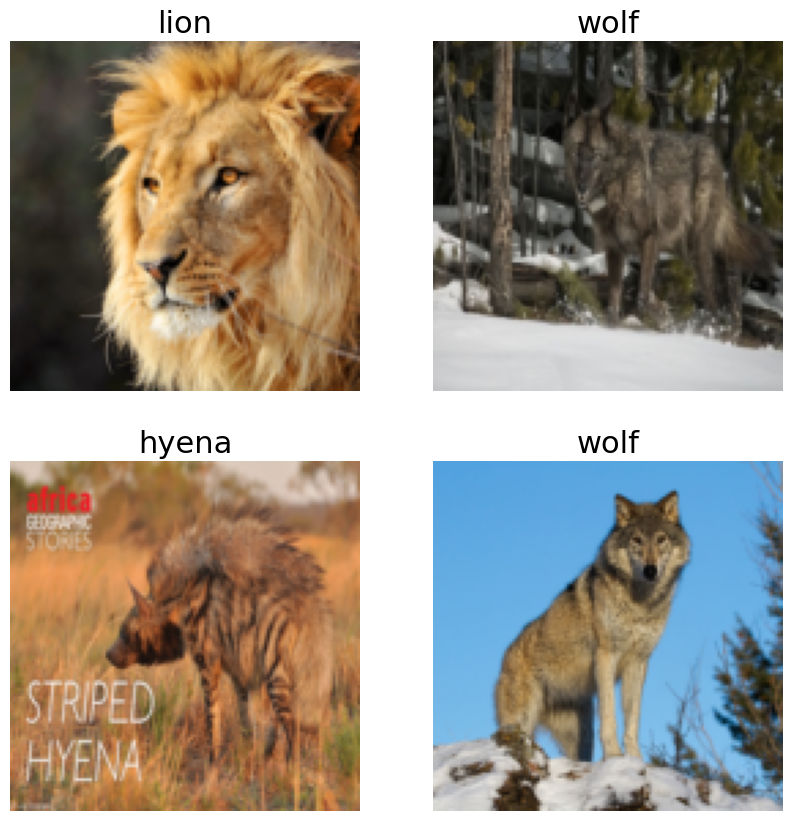

In [6]:
_ = showImages(images, labels)

# Create model

In [7]:
from model_zoo import animalModel,Animal2

In [8]:
num_classes = len(classes)  
model = Animal2(3, num_classes)
num_epochs = 40
valSteps = len(val_loader)
writer = SummaryWriter()
lossF = nn.CrossEntropyLoss()
learningRate = 1e-3
momentum = 0.9
optimizer = optim.SGD(model.parameters(), lr=learningRate, momentum=momentum)
accMetric = Accuracy(task='multiclass',num_classes=num_classes)
writer.add_hparams({'lr':learningRate,'optim':'SGD','Batch Size':batch_size,'Number of epochs':num_epochs,'momentum':momentum,'image size':imageSize},{'hparam/accuracy':0.0})

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trainsteps  = len(train_loader)

In [10]:
model = model.to(device)
writer.add_graph(model, images.to(device))
accMetric.to(device)

MulticlassAccuracy()

In [11]:
model.fit(train_loader,val_loader,criterion=lossF,optimizer=optimizer,device=device,writer=writer,accMetric=accMetric,epochs=num_epochs)

Epoch: 0


0it [00:00, ?it/s]

2it [00:00,  3.57it/s]

4it [00:00,  6.01it/s]

6it [00:01,  7.59it/s]

9it [00:01,  8.65it/s]

10it [00:01,  8.89it/s]

12it [00:01,  9.08it/s]

14it [00:01,  9.25it/s]

17it [00:02,  9.24it/s]

18it [00:02,  9.33it/s]

20it [00:02,  9.38it/s]

23it [00:02,  9.39it/s]

24it [00:02,  9.32it/s]

26it [00:03,  9.38it/s]

28it [00:03,  9.40it/s]

30it [00:03,  9.38it/s]

32it [00:03,  9.35it/s]

34it [00:04,  9.45it/s]

36it [00:04,  9.42it/s]

38it [00:04,  9.44it/s]

40it [00:04,  9.43it/s]

43it [00:05,  9.41it/s]

44it [00:05,  7.38it/s]


Training Loss: 1.7787406525828622 Training Accuracy: 0.19602273404598236


KeyboardInterrupt: 